In [61]:
import numpy as np
import skimage.exposure
import skimage.transform
import scipy.signal
import scipy
import filtro_ideal
import matplotlib.pyplot as plot
import filtro_gaussiano
import filtro_Butterworth
import cv2

### Filtro ideal

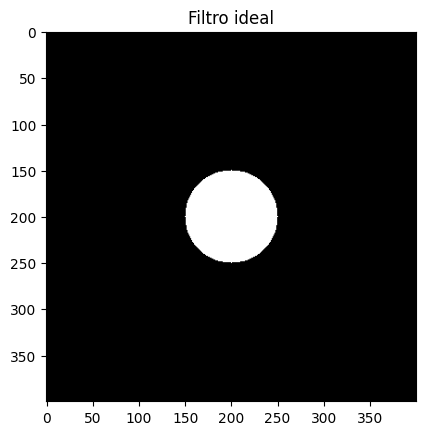

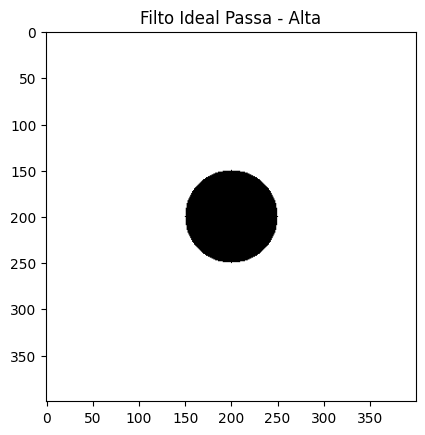

In [62]:

#chamando a função
H_ideal = filtro_ideal.mascara_ideal2D(M = 400,N = 400,fc = 0.25)
H_ideal_alta = 1- H_ideal

#passa baixa
plot.figure()
plot.title('Filtro ideal')
#imshow ele só aceita números reais(int ou float), porém, H_ideal é do tipo complex. Portanto, plotamos o MÓDULO de H_ideal.
plot.imshow(np.abs(H_ideal), cmap = 'gray')

#passa alta
plot.figure()
plot.title('Filto Ideal Passa - Alta')
plot.imshow(np.abs(H_ideal_alta), cmap = 'gray')

### Filtro Gaussiano 

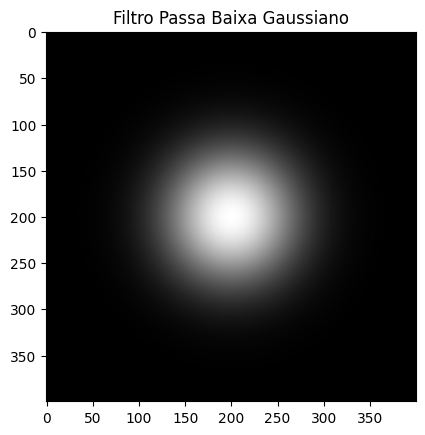

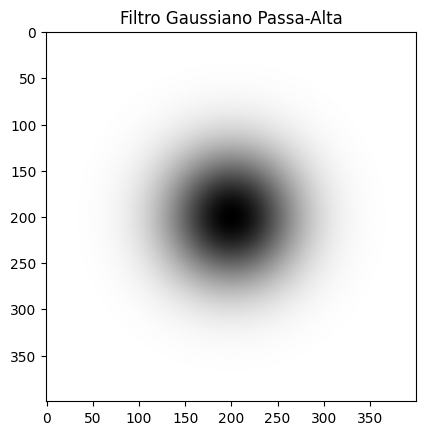

In [63]:
H_Gauss = filtro_gaussiano.gaussiana(M=400,N = 400, fc = 0.25)
H_Gauss_alta = 1 - H_Gauss

#Passa - Baixa
plot.figure()
plot.title('Filtro Passa Baixa Gaussiano')
#imshow ele só aceita números reais(int ou float), porém, H_ideal é do tipo complex. Portanto, plotamos o MÓDULO de H_ideal.
plot.imshow(np.abs(H_Gauss), cmap = 'gray')

#Passa Alta
plot.figure()
plot.title('Filtro Gaussiano Passa-Alta')
plot.imshow(np.abs(H_Gauss_alta), cmap = 'gray')



### Filtro Butterworth

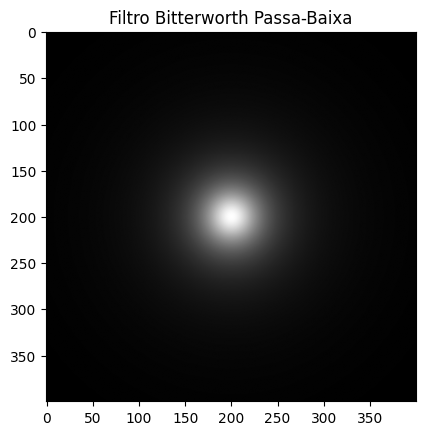

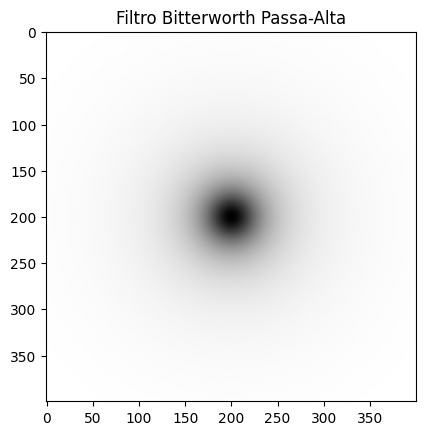

In [64]:
H_Butter = filtro_Butterworth.butter(M = 400, N = 400, fc = 0.25, n = 3)
H_Butter_alta = 1 - H_Butter

#Passa-Baixa
plot.figure()
plot.title('Filtro Bitterworth Passa-Baixa')
plot.imshow(np.abs(H_Butter), cmap = 'gray')

#Passa - Alta
plot.figure()
plot.title('Filtro Bitterworth Passa-Alta')
plot.imshow(np.abs(H_Butter_alta), cmap = 'gray')


### Filtragem de uma imagem médica (Ideal)


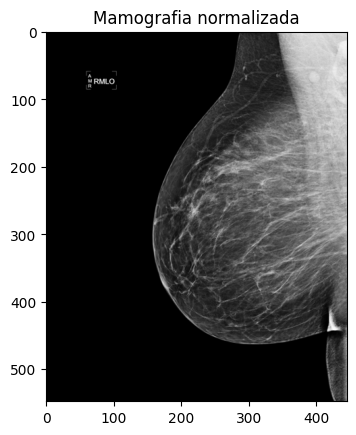

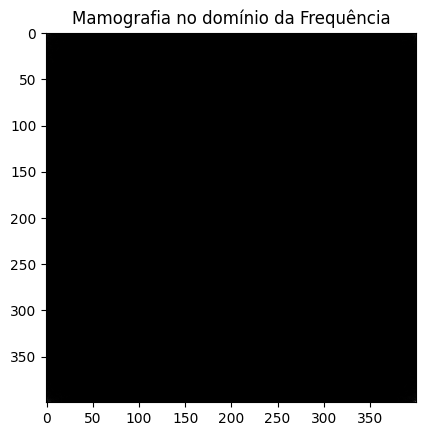

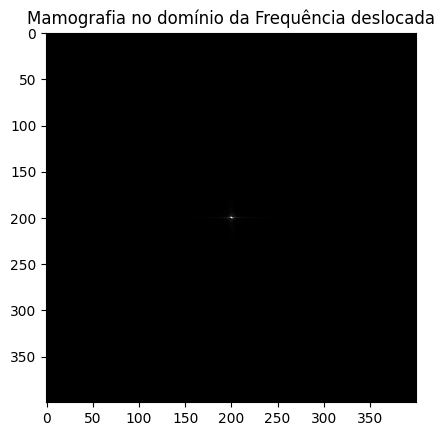

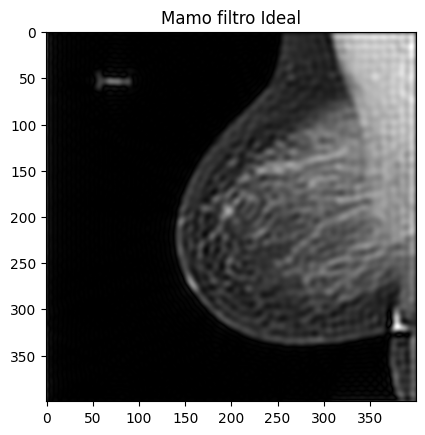

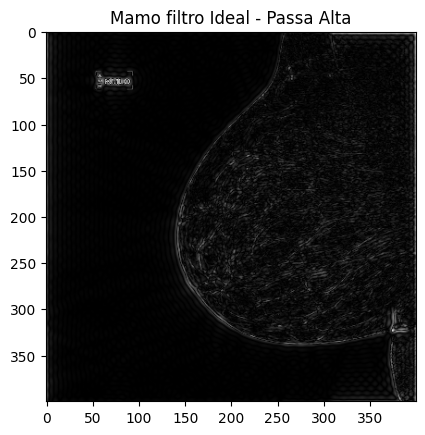

In [65]:
mamo = cv2.imread(r"C:\Unifesp\imagens_biomedicas\aula2_transformacao_de_intensidade\Mamography.pgm",0)
mamo = skimage.img_as_float(mamo)
plot.figure()
plot.title('Mamografia normalizada')
plot.imshow(mamo, cmap = 'gray')

#precisamos que a imagem lida tenha o mesmo tamanho do filtro(400x400)
mamo_tam = cv2.resize(mamo, (400,400))

#Imagem domínio na frequência
mamo_freq = np.fft.fft2(mamo_tam)
plot.figure()
plot.title('Mamografia no domínio da Frequência')
plot.imshow(np.abs(mamo_freq), cmap = 'gray')

#Deslocamento do espectro de frequência
mamo_freq_shift = np.fft.fftshift(mamo_freq)
plot.figure()
plot.title('Mamografia no domínio da Frequência deslocada')
plot.imshow(np.abs(mamo_freq_shift), cmap = 'gray')

#filtragem: acontece quando multiplicamos o espectro no domínio da frequência da imagem com a função de transferência.
mascara_ideal = filtro_ideal.mascara_ideal2D(M = 400,N = 400,fc = 0.2)
mamo_filtrada_ideal = mamo_freq_shift * mascara_ideal
# Desfazer o shift e aplicar transformada inversa
mamo_reconst_shift_ideal = np.fft.ifftshift(mamo_filtrada_ideal)
mamo_final_ideal = np.abs(np.fft.ifft2(mamo_reconst_shift_ideal))

#visualizar
plot.figure()
plot.title('Mamo filtro Ideal')
plot.imshow(mamo_final_ideal, cmap = 'gray')

# Passa Alta
ideal_passa_alta = 1 - mascara_ideal
mamo_filtrada_ideal = mamo_freq_shift * ideal_passa_alta
mamo_reconst_shift_ideal = np.fft.ifftshift(mamo_filtrada_ideal)
mamo_final_ideal = np.abs(np.fft.ifft2(mamo_reconst_shift_ideal))
plot.figure()
plot.title('Mamo filtro Ideal - Passa Alta')
plot.imshow(mamo_final_ideal, cmap = 'gray')

### Filtragem Gaussiana - Mamografia

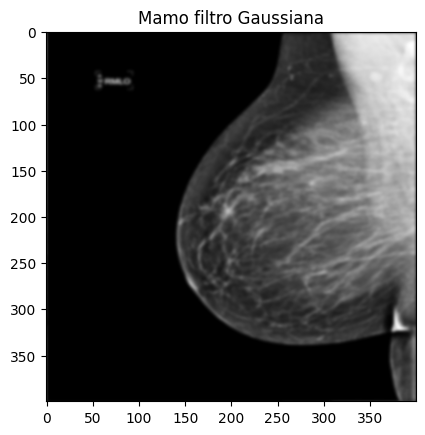

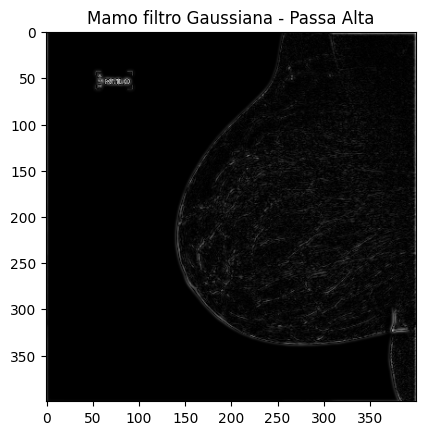

In [66]:
#filtragem: acontece quando multiplicamos o espectro no domínio da frequência da imagem com a função de transferência.
mascara_gaussiana = filtro_gaussiano.gaussiana(M = 400,N = 400,fc = 0.2)
mamo_filtrada_gaussiana = mamo_freq_shift * mascara_gaussiana
# Desfazer o shift e aplicar transformada inversa
mamo_reconst_shift_gauss = np.fft.ifftshift(mamo_filtrada_gaussiana)
mamo_final_gaussiana = np.abs(np.fft.ifft2(mamo_reconst_shift_gauss))

#visualizar
plot.figure()
plot.title('Mamo filtro Gaussiana')
plot.imshow(mamo_final_gaussiana, cmap = 'gray')

# Filtro Passa Alta
gaussiana_alta = 1 - mascara_gaussiana
mamo_filtrada_gaussiana = mamo_freq_shift * gaussiana_alta
# Desfazer o shift e aplicar transformada inversa
mamo_reconst_shift_gauss = np.fft.ifftshift(mamo_filtrada_gaussiana)
mamo_final_gaussiana = np.abs(np.fft.ifft2(mamo_reconst_shift_gauss))
plot.figure()
plot.title('Mamo filtro Gaussiana - Passa Alta')
plot.imshow(mamo_final_gaussiana, cmap = 'gray')

### Filtragem Butterworth - Mamografia

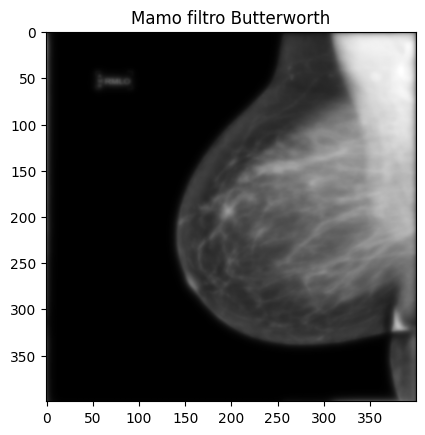

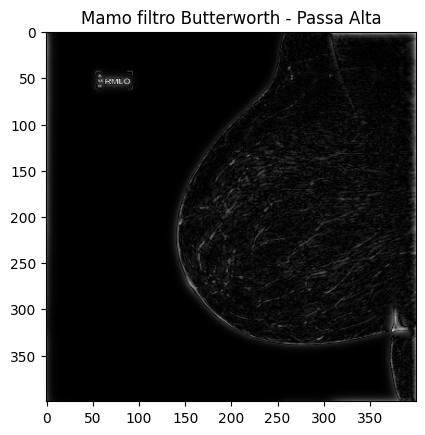

In [67]:
#filtragem: acontece quando multiplicamos o espectro no domínio da frequência da imagem com a função de transferência.
mascara_butter= filtro_Butterworth.butter(M = 400,N = 400,fc = 0.2, n = 4)
mamo_filtrada_butter = mamo_freq_shift * mascara_butter
# Desfazer o shift e aplicar transformada inversa
mamo_reconst_shift_butter = np.fft.ifftshift(mamo_filtrada_butter)
mamo_final_butter = np.abs(np.fft.ifft2(mamo_reconst_shift_butter))

#visualizar
plot.figure()
plot.title('Mamo filtro Butterworth')
plot.imshow(mamo_final_butter, cmap = 'gray')

# Filtro Passa - Alta
but = filtro_Butterworth.butter(M = 400,N = 400,fc = 0.2, n = 4)
mascara_butter = 1 - but
mamo_filtrada_butter = mamo_freq_shift * mascara_butter
# Desfazer o shift e aplicar transformada inversa
mamo_reconst_shift_butter = np.fft.ifftshift(mamo_filtrada_butter)
mamo_final_butter = np.abs(np.fft.ifft2(mamo_reconst_shift_butter))

#visualizar
plot.figure()
plot.title('Mamo filtro Butterworth - Passa Alta')
plot.imshow(mamo_final_butter, cmap = 'gray')